# Hitters Veri Seti ile Doğrusal Regresyon Modelleri Kullanılarak Maaş Tahmini

Bu projede doğrusal regresyon modelleri kullanılarak maaş tahmini üzerine bir proje gerçekleştirilecektir. Hitters veri seti hakkında ve doğrusal regresyon modelleri hakkında temel bilgiler verilecektir. Proje beyzbol oyuncularının maaşlarını tahmin edecek bir makine öğrenmesi modeli geliştirmektir. Kullanıcının performanslarına ilişkin bir veri setimiz bulunmaktadır. Veri seti Amerika'da bulunan bir beyzbol liginin 1986 - 1987 sezonunundaki verileri ve bu ligde oynayan oyuncuların verilerini içeren bir veri setidir.

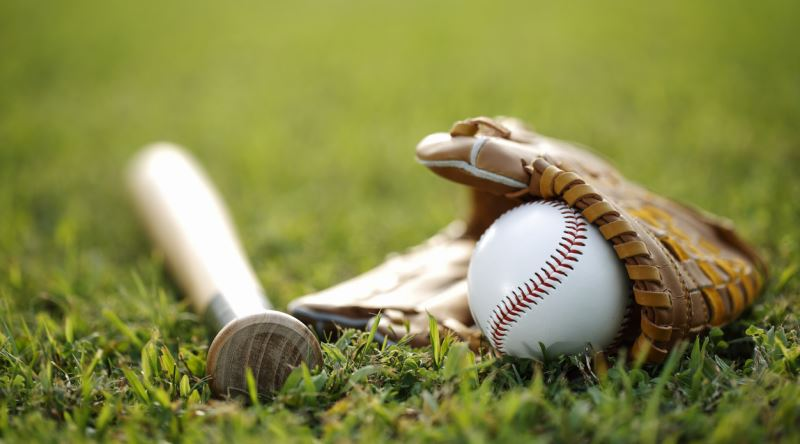

**Doğrusal Regresyon Modelleri:**
- **Basit Doğrusal Regresyon**
- **Doğrusal Regresyon**
- **Ridge Regresyon**
- **Lasso Regresyon**
- **ElasticNet Regresyon**

**1. Bağımlı Değişken:**
- **Salary**: 1986-1987 sezonunda kazanılan maaş

**2. Açıklayıcı Değişkenler:**

Hitters Veri setinde yer alan değişkenlerin açıklanması

- **AtBat**: 1986-1987 sezonunda bir beyzbol sopası ile topa yapılan vuruş sayısı
- **Hits**: 1986-1987 sezonundaki isabet sayısı
- **HmRun**: 1986-1987 sezonundaki en değerli vuruş sayısı
- **Runs**: 1986-1987 sezonunda takımına kaç sayı kazandırdı
- **RBI**: Bir vurucunun vuruş yaptıgında kaç tane oyuncuya koşu yaptırdığı.
- **Walks**: Karşı oyuncuya kaç defa hata yaptırdığı
- **Years**: Oyuncunun major liginde kaç sene oynadığı
- **CAtBat**: Oyuncunun kariyeri boyunca kaç kez topa vurduğu
- **CHits**: Oyuncunun kariyeri boyunca kaç kez isabetli vuruş yaptığı
- **CHmRun**: Oyucunun kariyeri boyunca kaç kez en değerli vuruşu yaptığı
- **CRuns**: Oyuncunun kariyeri boyunca takımına kaç tane sayı kazandırdığı
- **CRBI**: Oyuncunun kariyeri boyunca kaç tane oyuncuya koşu yaptırdığı
- **CWalks**: Oyuncun kariyeri boyunca karşı oyuncuya kaç kez hata yaptırdığı
- **League**: Oyuncunun sezon sonuna kadar oynadığı ligi gösteren A ve N seviyelerine sahip bir faktör
- **Division**: 1986 sonunda oyuncunun oynadığı pozisyonu gösteren E ve W seviyelerine sahip bir faktör
- **PutOuts**: Oyun icinde takım arkadaşınla yardımlaşma
- **Assits**: 1986-1987 sezonunda oyuncunun yaptığı asist sayısı
- **Errors**: 1986-1987 sezonundaki oyuncunun hata sayısı
- **Salary**: Oyuncunun 1986-1987 sezonunda aldığı maaş(bin uzerinden)
- **NewLeague**: 1987 sezonunun başında oyuncunun ligini gösteren A ve N seviyelerine sahip bir faktör

**Gözlem Sayısı: 322**

**Değişken Sayısı: 20**

**Yapılan işlemler elde edilen sonuçlar aşağıda verilmiştir. En düşük hatayı Ridge Regresyon vermiştir.**

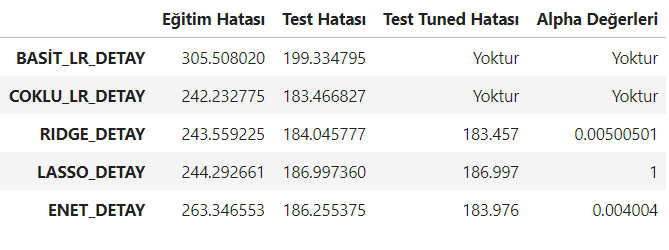  
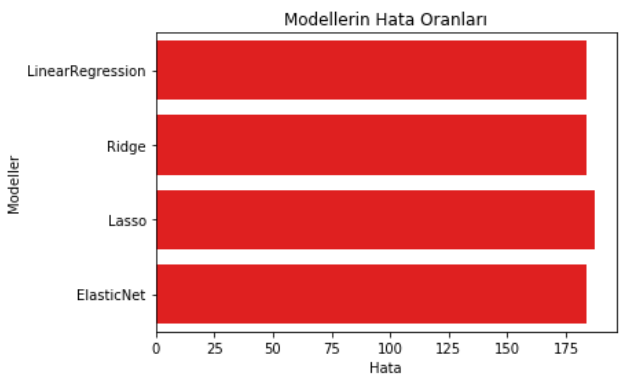

# 1) Keşifci Veri Analizi

In [ ]:
# Gerekli import işlemleri gerçekleştirildi. Doğrusal Regresyon modellerine ait import işlemleri yapıldı.
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
# Veri seti okuma işlemi gerçekleştirildi.
df = pd.read_csv("../input/hitters/Hitters.csv")

In [ ]:
# Veri setinin ilk 5 gözlem birimine erişildi.
df.head()

In [ ]:
# Veri setinin boyutu incelendi. 322 gözlem birimi ve 20 değişkenden oluşmaktadır.
df.shape

In [ ]:
# Veri setinin yapısal bilgilerine ulaşıldı.
df.info()

In [ ]:
# Değişkenlerdeki eşşiz gözlem sayılarına erişim sağlandı.
df.nunique()

In [ ]:
# League bir kategorik değişken olduğu için buradaki sınıflardan kaç adet olduğu incelenildi. 
# League değişkeni oyuncunun oynamış olduğu lig hakkında bilgi vermektedir.
df["League"].value_counts()

In [ ]:
df.League.value_counts().plot.barh();

In [ ]:
# NewLeague bir kategorik değişken olduğu için buradaki sınıflardan kaç adet olduğu incelenildi. 
# NewLeague değişkeni oyuncunun 1987 yılında hangi ligde oynayacağı hakkında bilgi vermektedir.
df["NewLeague"].value_counts()

In [ ]:
df.NewLeague.value_counts().plot.barh();

In [ ]:
# Division bir kategorik değişken olduğu için buradaki sınıflardan kaç adet olduğu incelenildi. 
# Division değişkeni oyuncunun oynadığı pozisyon hakkında bilgi vermektedir.
df["Division"].value_counts()

In [ ]:
df.Division.value_counts().plot.barh();

In [ ]:
# Salary (Maaş) değişkeninin maksimum değerine erişilmiştir. Aynı zamanda bağımlı değişkenimizdir.
df["Salary"].max()

In [ ]:
# Salary (Maaş) değişkeninin minimum değerine erişilmiştir.
df["Salary"].min()

In [ ]:
# Salary (Maaş) değişkeninin histogram ve yoğunluk grafiği çizdirilmiştir.
sns.distplot(df.Salary);

In [ ]:
# Veri setinin betimsel istatistiklerine erişildi.
df.describe().T

In [ ]:
# Veri setinin korelasyonuna erişim sağlanmıştır. Değişkenler arasında ne tarz bir ilişki olduğu incelenmiştir. 
# Korelasyon değeri > 0 ise pozitif korelasyon bulunmaktadır. Bir değişken değeri artarken diğer değişkenin de değeri artmaktadır.
# Korelasyon = 0 ise korelasyon yoktur anlamına gelmektedir.
# Korelasyon < 0 ise negatif korelasyon bulunmaktadır. Bir değişken artarken diğer değişken azalmaktadır. 
# Korelasyonlar incelendiğinde Salary bağımlı değişkene pozitif korelasyon olarak etkimekte olan 2 değişken bulunmaktadır. 
# Bu değişkenler CRBI ile CRuns değişkenleridir. Bunlar arttıkça Salary (Maaş) değişkeni de artmaktadır.
df.corr()

In [ ]:
# Veri setinin korelasyon matrisi grafiğine erişim sağlanmıştır.
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [ ]:
# League değişkenine göre groupby yapılıp hangi ligde ortalama ne kadar maaş alınmakta bu incelenmiştir.
df.groupby("League").agg({"Salary": "mean"})

In [ ]:
# 1987 yılında oynayacakları yeni liglerde ortalama ne kadar maaş alınmakta bu incelenmiştir.
df.groupby("NewLeague").agg({"Salary": "mean"})

In [ ]:
# Oyuncunun oynadığı pozisyona göre ortalama ne kadar maaş almakta bu incelenmiştir.
df.groupby("Division").agg({"Salary": "mean"})

In [ ]:
# Veri setinin korelasyonu incelendiğinde CRBI değişkeni pozitif yönlü korelasyona sahipti. Bu değişken arttıkça Salary değişkeninde artması gerekmektedir.
# Buna dayalı olarak CRBI değişkeni kariyeri boyunca yapmış olduğu vuruş sayısıdır. Buna göre gruplayıp Salary değişkeninin ortalaması incelenmiştir.
df.groupby("CRBI").agg({"Salary": "mean"})

In [ ]:
# Veri setinin korelasyonu incelendiğinde CRBI değişkeni pozitif yönlü korelasyona sahipti. Bu değişken arttıkça Salary değişkeninde artması gerekmektedir.
# Buna dayalı olarak CRuns değişkeni kariyeri boyunca yapmış olduğu koşu sayısıdır. Buna göre gruplayıp Salary değişkeninin ortalaması incelenmiştir.
df.groupby("CRuns").agg({"Salary": "mean"})

In [ ]:
# League ve Years değişkenlerine göre gruplayıp acaba hangi ligde ve kariyer süresine göre maaş ortalaması nedir?
# Lig ve toplam kariyer yıllarına göre gruplanarak oyuncunun aldıkları maaşların ortalaması nedir? 
df.groupby(["League","Years"]).agg({"Salary": "mean"})

In [ ]:
# NewLeague ve Years değişkenlerine göre gruplayıp acaba 1987 oynadığı lig ve kariyer süresine göre maaş ortalaması nedir?
#  Yeni Lig ve toplam kariyer süresine göre gruplanarak oyuncunun aldıkları maaşların ortalaması nedir? 
df.groupby(["NewLeague","Years"]).agg({"Salary": "mean"})

In [ ]:
# Oyuncuların oynadıkları pozisyonlara göre aldıkları ortalama maaş nedir buna erişilmiştir.
df.groupby(["Division","Years"]).agg({"Salary": "mean"})

In [ ]:
#Kariyeri boyunca isabet sayısı en yüksek olan gözlem birimlerine veri setini azalan şekilde sıralayarak erişilmiştir. 
df.sort_values("CHits",ascending = False)

In [ ]:
# Liglere göre gruplayıp kariyeri boyunca yapılan isabet sayılarının maksimum değerine erişilmiştir.
df.groupby("League").agg({"CHits": "max"})

In [ ]:
# Oyuncuların oynadıkları pozisyonlara göre gruplama yapılıp kariyeri boyunca isabet sayısının maksimum değerine erişilmiştir.
df.groupby("Division").agg({"CHits": "max"})

In [ ]:
# Lig değişkenine göre gruplayıp 1986 yılındaki isabet değerlerinin maksimumuna erişilmiştir.
df.groupby("League").agg({"Hits": "max"})

In [ ]:
# Lig değişkenine göre gruplayıp 1986 yılında beyzbol sopası ile yapılan vuruş sayısının maksimum değerlerine erişildi.
df.groupby("League").agg({"AtBat": "max"})

In [ ]:
# Lig değişkenine göre gruplayıp kariyer süresinin ortalama değerlerine erişilmiştir.
df.groupby("League").agg({"Years": "mean"})

In [ ]:
# Lig değişkenine göre gruplayıp kariyer süresinin maksimum değerlerine erişilmiştir.
df.groupby("League").agg({"Years": "max"})

In [ ]:
# Lig değişkenine göre gruplayıp hangi ligde kaç hata yapılmakta bunun ortalama değerlerine erişilmiştir.
df.groupby("League").agg({"Errors": "mean"})

In [ ]:
# Lig değişkenine göre gruplayıp hangi ligde kaç hata yapılmakta bunun maksimum değerlerine erişilmiştir.
df.groupby("League").agg({"Errors": "max"})

In [ ]:
# Lig değişkenine göre gruplayıp 1986 yılında yapılan satış değerinin maksimum değerlerine erişilmiştir.
df.groupby("League").agg({"PutOuts": "max"})

In [ ]:
# Lig değişkenine göre gruplayıp liglerde maksimum kaç asist yapılmakta bu değere erişilmiştir.
df.groupby("League").agg({"Assists": "max"})

In [ ]:
# Kariyer süresine göre gruplayıp oyuncunun kariyeri boyunca beyzbol sopası ile yapılan vuruş sayısının maksimum değerlerine erişim sağlanmıştır.
df.groupby("Years").agg({"CAtBat": "max"})

In [ ]:
# lig ve Kariyer süresine göre gruplayıp oyuncunun kariyeri boyunca beyzbol sopası ile yapılan vuruş sayısının maksimum değerlerine erişim sağlanmıştır.
df.groupby(["League", "Years"]).agg({"CAtBat": "max"})

In [ ]:
# Lig değişkenine göre gruplayıp kariyeri boyunca acaba liglerde beyzbol sopası ile ortalama kaç atış gerçekleşmiştir buna erişim sağlandı.
df.groupby("League").agg({"CAtBat": "mean"})

# 2) VERİ ÖN İŞLEME

### 1) Yeni Değişkenler Oluşturma

Yeni değişkenler oluşturmak modeller için önem arz etmektedir. Ancak mantıklı bir yeni değişken oluşturmak gerekir. Bu veri setinde oyuncunun kariyerine bağlı değişkenler yer almaktadır ve kariyer süresi yer almaktadır. Bu durumda **kariyere bağlı değişkenler / kariyer süresi** yapılırsa oyuncu için ortalama değerler elde edilerek mantıklı bir değişken oluşturulabilir. Aşağıda yapılan işlemde bunu ele alıyor olacağız.

In [ ]:
# Kariyerleri ile ilgili olan değişkenler kariyer yıllarına bölünerek ortalama değerler elde edilerek veri setinde yeni değişkenler oluşturulmuştur.
df["OrtCAtBat"] = df["CAtBat"] / df["Years"]
df["OrtCHits"] = df["CHits"] / df["Years"]
df["OrtCHmRun"] = df["CHmRun"] / df["Years"]
df["OrtCruns"] = df["CRuns"] / df["Years"]
df["OrtCRBI"] = df["CRBI"] / df["Years"]
df["OrtCWalks"] = cwalks = df["CWalks"] / df["Years"]
df.head()

In [ ]:
# Modele oyuncunun özellikleri ile ilgili değişkenleri verme işlemi gerçekleştiriyoruz. Diğer değişkenler sezon boyunca gerçekleşen değişkenler. 
# Amacımız bir oyuncuya maaş tahmini yapmak ise o oyuncunun kişisel değerlerine bakılarak tahmin yapılmak daha mantıklı olacaktır.
df = df.drop(['AtBat','Hits','HmRun','Runs','RBI','Walks','Assists','Errors',"PutOuts",'League','NewLeague'], axis=1)

In [ ]:
# df'in ilk 5 gözlem birimine erişim sağlandı.
df.head()

### 2) One Hot Encoding Dönüşümü

In [ ]:
# Veri setinde yer alan kategorik değişkenlerin sayısal değerlere dönüştürülmesi gerekmektedir. 
# Bu nedenle bu dönüşüm işlemleri Label Encoding ve One Hot Encoding yöntemi ile yapılmaktadır.
# Burada One Hot Encoding dönüşümü yapılarak kategorik değişkenler sayısal değerlere dönüşülmüştür. Aynı zamanda Dummy değişken tuzağından da korunulmuştur.
df = pd.get_dummies(df, columns =["Division"], drop_first = True)

In [ ]:
df.head()

### 3) Eksik Gözlem Analizi

In [ ]:
# Veri setinde eksik gözlem olup olmadığı sorgulanmaktadır.
df.isnull().sum()

In [ ]:
# Eksik gözlemlerin görselleştirilmesi için missingno kütüphanesi kullanılarak eksik gözlemler görselleştirilmiştir.
import missingno as msno
msno.bar(df);

In [ ]:
# Salary (Maaş) değişkeninde 59 adet eksik gözlem bulunmakta acaba bu eksik gözlemler kaç yıllık kariyere sahip ve hangi ligde oynamaktalar buna erişim sağlanmıştır.
# Kısaca eksik gözlem olan değerler acaba kaç yıllık kariyer ve hangi ligde oynamaktalar buna erişim sağlandı.
df_eksik = df[df["Salary"].isnull()].head()
df_eksik

### 3.1) Eksik Gözlem Birimlerinin Doldurulması

In [ ]:
# Eksik gözlemler KNN Algoritması ile dolduruldu.
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors = 5)
df_filled = imputer.fit_transform(df)

In [ ]:
# Tekrar sorgulandı eksik değer var mı diye hepsinin KNN algoritması ile doldurulduğu gözlemlendi.
df = pd.DataFrame(df_filled,columns = df.columns)
df.isnull().sum()

### 4) Aykırı Gözlem Analizi

In [ ]:
# Salary değişkenini boxplot yöntemi ile görselleştirme işlemi yapılmıştır. Aykırı gözlemlere grafikte rastlamaktayız.
import seaborn as sns
sns.boxplot(x = df["Salary"]);

In [ ]:
# Bağımlı değişkenin betimsel istatistiklerine erişim sağlanmıştır.
df["Salary"].describe()

In [ ]:
# İlk olarak % 1 lik çeyreklik ve % 99 daki çeyreklikler incelendiğinde aykırı gözleme rastlanmamıştır.
# Daha sonra % 5 lik çeyreklik ve % 95 deki çeyreklikler incelendiğinde aykırı gözleme rastlanmamıştır.
# Son olarak % 25 lik çeyreklik ve % 75 lik çeyreklikler incelendiğinde aykırı gözleme rastlanmıştır.
# Sonuç: 25 ve 75'lik çeyrekliklere göre bağımlı değişkene aykırı gözlem analizi uygulanacktır. İş sektör bilgisi konusunda dokunulmayadabilir.
# Burada 25 ve 75'lik çeyrekliklerde tüm değişkenlerde kaç adet aykırı gözlem var buna erişim sağlanmıştır.

for feature in df:

    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    upper = Q3 + 1.5*IQR
    lower = Q1 - 1.5*IQR

    if df[(df[feature] > upper) | (df[feature] < lower)].any(axis=None):
        print(feature,"yes")
        print(df[(df[feature] > upper) | (df[feature] < lower)].shape[0])
    else:
        print(feature, "no")

In [ ]:
# Salary değişkeni için akırı gözlem analizinde kullanılan IQR derinin hesaplanması ve alt ve üst sınırların belirlenilmesi işlemi gerçekleştirilmiştir.
# Bulunan aykırı gözlemler üst sınır ile baskılanmıştır. Aykırı gözlem analizinde en yaygın olarak baskılama yöntemi kullanılmaktadır. 
Q1 = df.Salary.quantile(0.25)
Q3 = df.Salary.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df.loc[df["Salary"] > upper,"Salary"] = upper

In [ ]:
# Aykırı değerler üst sınır ile baskılandırılarak Salary değişkenin boxplot (kutu) grafiği çizdirilerek aykırı değerlerden kurtulduğunu gözlemlemekteyiz.
import seaborn as sns
sns.boxplot(x = df["Salary"]);

### 4.1) Local Outlier Factor Yöntemi ile Aykırı Gözlem Analizi (LOF)

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
lof =LocalOutlierFactor(n_neighbors= 20)
lof.fit_predict(df)

In [ ]:
# Skor değerleri gelmiştir.
df_scores = lof.negative_outlier_factor_
np.sort(df_scores)[0:30]

In [ ]:
# Eşik değeri belirlenilmiştir.
threshold = np.sort(df_scores)[9]
threshold

In [ ]:
# Belirlenen eşik değer veri setine uyarlanarak aykırı gözlemlerden kurtulunmuş olundu.
outlier = df_scores > threshold
df = df[outlier]

In [ ]:
# Aykırı değerlerden kurtulduktan sonra veri setimizin boyutu incelenilmiştir.
df.shape

# 3) Doğrusal Regresyon Modelleri ile Modelleme 

- Basit Doğrusal Regresyon
- Çoklu Doğrusal Regresyon
- Ridge Regresyon
- Lasso Regresyon
- ElasticNet Regresyon

Her bir model tüm veri seti ile modellenebilir ancak du durumun bir dezavantajı bulunmaktadır model daha önce hiç görmediği verilerde kötü sonuçlar üretecektir. Veri setini train ve test şeklinde ayırıp bu şekilde bir model kurulum işlemi gerçekleştirilip alınan hata değerleri gözlemlenecektir. İsterseniz tüm veri ile de modeller kurabilirsiniz.

## 1) Basit Doğrusal Regresyon

In [ ]:
# Gerekli import işlemleri gerçekleştirilmiştir.
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Bağımlı ve Bağımsız değişkenler seçilerek X ve y değişkenlerine atanmıştır. X bağımsız değişkeni standardize edilmiştir.
# Veri setinde yer alan değişkenleri standardizasyon işlemi yapılarak model kurulumunda alınan hataların düşürülmesinde etkili bir faktördür. 
# Birden çok standardizasyon yöntemi bulunmaktadır. Bunlar "Normalize", "MinMax" ve "Scale" gibi yöntemlerdir.
# Test ve Train ayırma işlemi gerçekleştirilmiştir. Train setinin % 20'si test setini oluşturmaktadır. Yani train = % 80 ve test = % 20 olarak ayrılmıştır.
X = df[["OrtCHits"]]
y = df[["Salary"]]
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=46)

### 1.1) Model Kurulum

In [ ]:
# Train setleri ile basit doğrusal regresyon model kurulum işlemi gerçekleştirilmiştir.
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

In [ ]:
# Basit Doğrusal Regresyonun model denklemi (formülü) yazdırılmıştır.
# İntercept: Model denkleminde yer alan b0 değeridir. Yükseklikde denilebilir.
# Coef: Model denkleminde yer alan b1, b2 ... bp değerleridir.
print("Formül: "+str(reg_model.intercept_)+" "+str(reg_model.coef_)+"x1")

### 1.2) Eğitim Hatası

In [ ]:
# Model eğitim hatası hesaplanmıştır.
y_pred = reg_model.predict(X_train)
reg_model_basit_egitim_hata = np.sqrt(mean_squared_error(y_train, y_pred))
reg_model_basit_egitim_hata

### 1.3) Test Hatası

In [ ]:
# Test Hatası
# Modelin daha önce görmediği veriler üzerinden test işlemi gerçekleştirilip RMSE Hata Değeri hesaplanmıştır.
y_pred = reg_model.predict(X_test)
reg_model_basit_test_hata = np.sqrt(mean_squared_error(y_test, y_pred))
reg_model_basit_test_hata

### 1.4) Model Doğrulama - K-Fold CV 

In [ ]:
# Model doğrulama yönetmlerinden K-Fold CV yöntemi kullanılarak model doğrulama işlemi gerçekleştirilmiştir.
from sklearn.model_selection import cross_val_score
print("Model Doğrulama RMSE Hata Değeri:" + str(np.sqrt(np.mean(-cross_val_score(reg_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")))))

## 2) Çoklu Doğrusal Regresyon

In [ ]:
# Gerekli import işlemleri gerçekleştirilmiştir.
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
# Bağımlı ve Bağımsız değişkenler belirlenip X ve y değişkenlerine atanmıştır.
# Daha sonra bağımsız değişkenler standardize edilmiştir ancak one hot encoding kısmında oluşan yeni dummy değişkenleri standardize etmemek gerekmektedir.
# Bu nedenle ilk önce bütün bağımsız değişkenler standardize edilip sonrasında dummy değişkenler 1-0 olarak dönüştürülmüştür.
# Standardize işlemi sonucunda dummy değişkenlerde yer alan 0 değerleri negatfi değerlere 1 değerleri pozitif değerlere dönüştürülmüştür.
# Bu nedenle 0'dan küçük olan değerlere 0, büyük olan değerlere 1 değeri bir for döngüsü yazılarak atanmıştır.
y = df["Salary"]
X = df.drop("Salary",axis=1)
X = scaler.fit_transform(X)
for i in range(len(X)):
    if X[i][13]<0:
        X[i][13]=0
    else:
        X[i][13]=1  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=46)

In [ ]:
# Ayrılmış olan veri setinin boyutlarına erişim sağlanmıştır.
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

### 2.1) Model Kurulum

In [ ]:
# Train setleri ile çoklu doğrusal regresyon model kurulum işlemi gerçekleştirilmiştir.
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

In [ ]:
# Model denkleminde yer alan b0 değeridir. Yükseklikde denilebilir.
reg_model.intercept_

In [ ]:
# Model denkleminde yer alan b1, b2 ... bp değerleridir.
reg_model.coef_

### 2.2) Eğitim Hatası

In [ ]:
# Model eğitim hatası hesaplanmıştır.
y_pred = reg_model.predict(X_train)
reg_model_egitim_hata = np.sqrt(mean_squared_error(y_train, y_pred))
reg_model_egitim_hata

### 2.3) Test Hatası

In [ ]:
# Test Hatası
# Modelin daha önce görmediği veriler üzerinden test işlemi gerçekleştirilip RMSE Hata Değeri hesaplanmıştır.
y_pred = reg_model.predict(X_test)
reg_model_test_hata = np.sqrt(mean_squared_error(y_test, y_pred))
reg_model_test_hata

### 2.4) Model Doğrulama - K-Fold CV 

In [ ]:
# Model doğrulama yönetmlerinden K-Fold CV yöntemi kullanılarak model doğrulama işlemi gerçekleştirilmiştir.
from sklearn.model_selection import cross_val_score
print("Model Doğrulama RMSE Hata Değeri:" + str(np.sqrt(np.mean(-cross_val_score(reg_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")))))

## 3) Ridge Regresyon

In [ ]:
# Gerekli import işlemleri yapılmıştır.
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV

### 3.1) Model Kurulum

In [ ]:
# Train setleri ile ridge regresyon model kurulum işlemi gerçekleştirilmiştir.
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

In [ ]:
# Model denkleminde yer alan b0 değeridir. Yükseklikde denilebilir.
ridge_model.intercept_

In [ ]:
# Model denkleminde yer alan b1, b2 ... bp değerleridir.
ridge_model.coef_

### 3.2) Eğitim Hatası

In [ ]:
# Model eğitim hatası hesaplanmıştır.
y_pred = ridge_model.predict(X_train)
ridge_model_egitim_hata = np.sqrt(mean_squared_error(y_train, y_pred))
ridge_model_egitim_hata

### 3.3) Test Hatası

In [ ]:
# Test Hatası
# Modelin daha önce görmediği veriler üzerinden test işlemi gerçekleştirilip RMSE Hata Değeri hesaplanmıştır.
y_pred = ridge_model.predict(X_test)
ridge_model_test_hata = np.sqrt(mean_squared_error(y_test, y_pred))
ridge_model_test_hata

### 3.4) Model Doğrulama - K-Fold CV

In [ ]:
# Model doğrulama yönetmlerinden K-Fold CV yöntemi kullanılarak model doğrulama işlemi gerçekleştirilmiştir.
from sklearn.model_selection import cross_val_score
print("Model Doğrulama RMSE Hata Değeri:" + str(np.sqrt(np.mean(-cross_val_score(ridge_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")))))

### 3.5) Model Hiperparametre Optimizasyonu

In [ ]:
# Kurulmuş olunan modelin hiperparametre değerlerine erişim sağlanmıştır. 
# Hiperparametre optimizasyonunda alpha değerinin en uygun değeri bulunarak final modeli kurulacaktır.
ridge_model

In [ ]:
# Bazı alpha setleri hazırlanılmıştır. Model için denenip en uygunu seçilecektir.
alphas1 = np.random.randint(0,1000,100)
alphas2 = 10**np.linspace(10,-2,100)*0.5
alphas3 = np.linspace(0,1,1000)
alphas4 = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1]
alphas5 = np.arange(100,10000,10) 

In [ ]:
# Belli alpha setleri denenerek final modeli için en uygun alpha değeri belirlenecektir. Cross Validation için RidgeCV fonk. Kullanılmaktadır.
ridge_cv = RidgeCV(alphas = alphas3, scoring = "neg_mean_squared_error", cv = 10, normalize = True)
ridge_cv.fit(X_train, y_train)

In [ ]:
# Final modeli için en uygun alpha değeri seçilmiştir.
ridge_cv.alpha_

In [ ]:
# Alpha değeri değişkene atanmıştır. Karşılaştırma dataframene eklemek için. 
ridge_alpha = ridge_cv.alpha_

### 3.6) Hiperparametre Optimizasyonu sonrasında Final Model Kurulumu (Model Tuning)

In [ ]:
# Belirlenen alpha değerine göre final modeli kururlmuştur.
ridge_tuned = Ridge(alpha = ridge_cv.alpha_)
ridge_tuned.fit(X_train, y_train)

### 3.7) Final Model Test Hatası

In [ ]:
y_pred = ridge_tuned.predict(X_test)
ridge_final_hata = np.sqrt(mean_squared_error(y_test, y_pred))
ridge_final_hata

## 4) Lasso Regresyon

In [ ]:
# Gerekli import işlemleri gerçekleştirilmiştir.
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV

### 4.1) Model Kurulum

In [ ]:
# Train setleri ile lasso regresyon model kurulum işlemi gerçekleştirilmiştir.
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

In [ ]:
# Model denkleminde yer alan b0 değeridir. Yükseklikde denilebilir.
lasso_model.intercept_

In [ ]:
# Model denkleminde yer alan b1, b2 ... bp değerleridir.
lasso_model.coef_

### 4.2) Eğitim Hatası

In [ ]:
# Model eğitim hatası hesaplanmıştır.
y_pred = lasso_model.predict(X_train)
lasso_model_egitim_hata = np.sqrt(mean_squared_error(y_train, y_pred))
lasso_model_egitim_hata

### 4.3) Test Hatası

In [ ]:
# Test Hatası
# Modelin daha önce görmediği veriler üzerinden test işlemi gerçekleştirilip RMSE Hata Değeri hesaplanmıştır.
y_pred = lasso_model.predict(X_test)
lasso_model_test_hata = np.sqrt(mean_squared_error(y_test, y_pred))
lasso_model_test_hata

### 4.4) Model Doğrulama - K-Fold CV

In [ ]:
# Model doğrulama yönetmlerinden K-Fold CV yöntemi kullanılarak model doğrulama işlemi gerçekleştirilmiştir.
print("Model Doğrulama Hatası:" + str(np.sqrt(np.mean(-cross_val_score(lasso_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")))))

### 4.5) Model Hiperparametre Optimizasyonu

In [ ]:
# Kurulmuş olunan modelin hiperparametre değerlerine erişim sağlanmıştır. 
# Hiperparametre optimizasyonunda alpha değerinin en uygun değeri bulunarak final modeli kurulacaktır.
lasso_model

In [ ]:
# Bazı alpha setleri belirlenilmiştir.
alphas1 = np.random.randint(0,1000,100)
alphas2 = 10**np.linspace(10,-2,100)*0.5
alphas3 = np.linspace(0,1,1000)
alphas4 = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]
alphas5 = np.arange(100,10000,10) 

In [ ]:
# Belli alpha setleri denenerek final modeli için en uygun alpha değeri belirlenecektir. Cross Validation için LassoCV fonk. Kullanılmaktadır.
lasso_cv = LassoCV(alphas = alphas3, cv = 10)
lasso_cv.fit(X_train, y_train)

In [ ]:
# Final modeli için gerekli olan alpha belirlenilmiştir.
lasso_cv.alpha_

In [ ]:
# Alpha değeri değişkene atanmıştır. Karşılaştırma dataframene eklemek için. 
lasso_alpha = lasso_cv.alpha_

### 4.6) Hiperparametre Optimizasyonu sonrasında Final Model Kurulumu (Model Tuning)

In [ ]:
# Belirlenen alpha değeri ile final modeli kurulum işlemi gerçekleştirilmiştir.
lasso_tuned = Lasso(alpha = lasso_cv.alpha_)
lasso_tuned.fit(X_train, y_train)

### 4.7) Final Modeli Test Hatası

In [ ]:
# Final Modeli Test Hatası
y_pred = lasso_tuned.predict(X_test)
lasso_final_hata = np.sqrt(mean_squared_error(y_test, y_pred))
lasso_final_hata

## 5) ElasticNet Regresyon

In [ ]:
# Gerekli import işlemleri gerçekleştirilmiştir.
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV,ElasticNetCV

### 5.1) Model Kurulum

In [ ]:
# ElasticNet Model kurulum işlemleri gerçekleştirilmiştir.
enet_model = ElasticNet()
enet_model.fit(X_train, y_train)

In [ ]:
# Model denkleminde yer alan b0 değeridir. Yükseklikde denilebilir.
enet_model.intercept_

In [ ]:
# Model denkleminde yer alan b1, b2 ... bp değerleridir.
enet_model.coef_

### 5.2) Eğitim Hatası

In [ ]:
# Eğitim Hatası
y_pred = enet_model.predict(X_train)
enet_model_egitim_hata = np.sqrt(mean_squared_error(y_train, y_pred))
enet_model_egitim_hata

### 5.3) Test Hatası

In [ ]:
# Test Hatası
y_pred = enet_model.predict(X_test)
enet_model_test_hata = np.sqrt(mean_squared_error(y_test, y_pred))
enet_model_test_hata

### 5.4) Model Doğrulama - K-Fold CV

In [ ]:
# Model doğrulama işlemi gerçekleştirilmiştir.
print("Model Doğrulama RMSE Hata Değeri:" + str(np.sqrt(np.mean(-cross_val_score(enet_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")))))

### 5.5) Model Hiperparametre Optimizasyonu

In [ ]:
enet_model

In [ ]:
# Parametre değerleri belirlenmiştir.
enet_params = {"l1_ratio": [0.1,0.4,0.5,0.6,0.8,1],
              "alpha": np.linspace(0,1,1000)}

In [ ]:
# Belirlenen parametrelere göre final modeli kurulacaktır.
enet_model = ElasticNet()
enet_model.fit(X_train, y_train)
from sklearn.model_selection import GridSearchCV
gs_cv_enet = GridSearchCV(enet_model, enet_params, cv = 10).fit(X_train, y_train)

In [ ]:
# En iyi parametreler belirlenilmiştir.
gs_cv_enet.best_params_

In [ ]:
# Alpha değeri değişkene atanmıştır. Karşılaştırma dataframene eklemek için. 
enet_alpha = 0.004004004004004004

### 5.6) Hiperparametre Optimizasyonu sonrasında Final Model Kurulumu (Model Tuning)

In [ ]:
# Belirlenen parametrelere göre final modeli kurulumu yapılmıştır.
enet_tuned = ElasticNet(**gs_cv_enet.best_params_)
enet_tuned.fit(X_train, y_train)

### 5.7) Final Modeli Test Hatası

In [ ]:
# Final Model Hatası
y_pred = enet_tuned.predict(X_test)
enet_final_hata = np.sqrt(mean_squared_error(y_test, y_pred))
enet_final_hata

# 4) Tüm Modellerin Karşılaştırılması

In [ ]:
# Modellerin karşılaştırılması yapılmıştır. 
modeller = [
    reg_model,
    ridge_tuned,
    lasso_tuned,
    enet_tuned,]


for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    hata = np.sqrt(mean_squared_error(y_test, y_pred))
    print("-"*28)
    print(isimler + ":" )
    print("Hata:" + str(hata))

In [ ]:
# Elde edilen hatalar görselleştirildi.
sonuc = []

sonuclar = pd.DataFrame(columns= ["Modeller","Hata"])

for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    hata = np.sqrt(mean_squared_error(y_test, y_pred))    
    sonuc = pd.DataFrame([[isimler, hata]], columns= ["Modeller","Hata"])
    sonuclar = sonuclar.append(sonuc)
    
    
sns.barplot(x= 'Hata', y = 'Modeller', data=sonuclar, color="r")
plt.xlabel('Hata')
plt.title('Modellerin Hata Oranları');  

In [ ]:
# Elde edilen sonuçlar dataframe olarak kaydedildi.
sonuclar_df = pd.DataFrame({"Eğitim Hatası":[reg_model_basit_egitim_hata, reg_model_egitim_hata, ridge_model_egitim_hata, lasso_model_egitim_hata, enet_model_egitim_hata],
                              "Test Hatası":[reg_model_basit_test_hata, reg_model_test_hata, ridge_model_test_hata, lasso_model_test_hata, enet_model_test_hata],                              
                              "Test Tuned Hatası":["Yoktur","Yoktur",ridge_final_hata, lasso_final_hata,enet_final_hata],
                               "Alpha Değerleri": ["Yoktur", "Yoktur", ridge_alpha,lasso_alpha, enet_alpha]})
sonuclar_df.index= ["BASİT_LR_DETAY", "COKLU_LR_DETAY","RIDGE_DETAY","LASSO_DETAY","ENET_DETAY"]

In [ ]:
# Sonuçlar incelendi.
sonuclar_df